## Metric Design 

### Introduction

In this exercice we are going to define a set of output and input metrics that will be relevant for the rest of our analysis. 

### Exercices

Frequency 

- What's the frequency of `review_score` from table `olist_order_reviews_dataset`?
- What's the frequency of `order_status` from the table `olist_orders_dataset`?
- In which state are sellers mostly located? What about customers?

Metrics 
- Which metric would you use as the output metric of Olist? 
- Which metric would you use to measure that a customer had a good experience with Olist? 
- Which metric would you use to measure shipping delay?
- For each metric, plot a trend line over time.

### 1 - Frequency 

In [1]:
#load modules 

import pandas as pd
import numpy as np
import os
import seaborn as sns

In [3]:
#load data
from olist.data import Olist

olist = Olist()
data = olist.get_data()

In [16]:
data.keys()

dict_keys(['olist_sellers_dataset', 'product_category_name_translation', 'olist_orders_dataset', 'olist_order_items_dataset', 'olist_customers_dataset', 'olist_geolocation_dataset', 'olist_order_payments_dataset', 'olist_order_reviews_dataset', 'olist_products_dataset'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128ef2310>]],
      dtype=object)

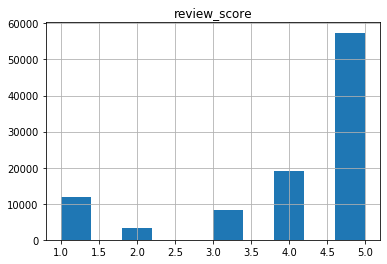

In [14]:
#Plot a histogram of review_score 
data['olist_order_reviews_dataset'].hist()

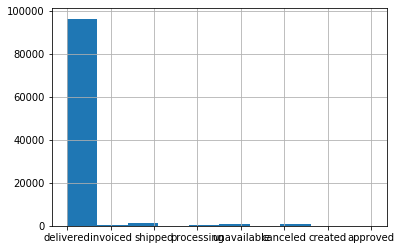

In [21]:
#Plot histogram of order_status
data['olist_orders_dataset']['order_status'].hist()

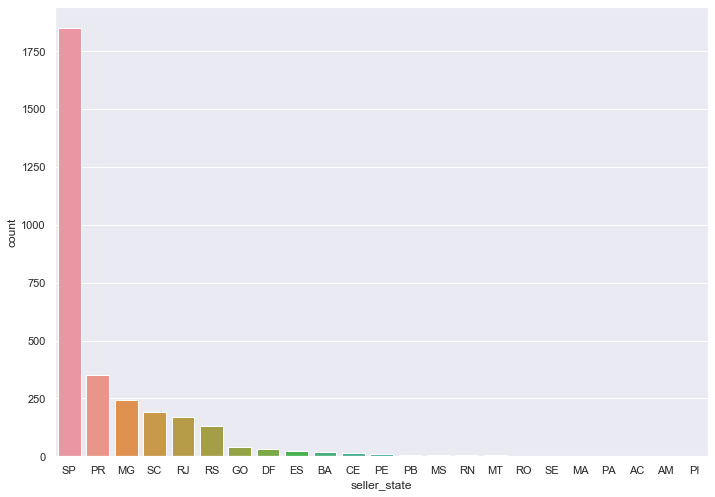

In [33]:
#Plot histogram of seller states
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='seller_state',data=data['olist_sellers_dataset'], order=data['olist_sellers_dataset']['seller_state'].value_counts().index);

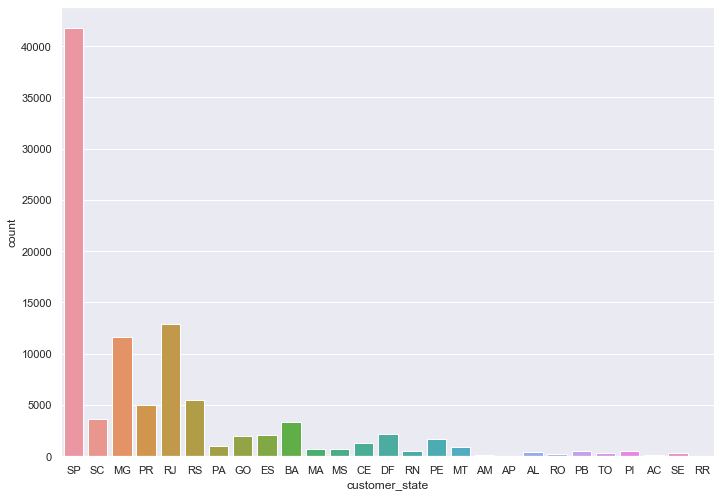

In [30]:
#Plot histogram of customers states
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='customer_state',data=data['olist_customers_dataset']);

## 2 - Metrics

#### Ouptut metric

In [31]:
#Plot output metric 
list_date_col = ['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']

In [34]:
# import datetime

In [35]:
#handle datetime

orders_df = data['olist_orders_dataset'].copy()
for column in list_date_col:
    orders_df[column] = pd.to_datetime(orders_df[column])
orders_df.info()

#plot numbers of monthly orders purchased

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null datetime64[ns]
order_approved_at                99281 non-null datetime64[ns]
order_delivered_carrier_date     97658 non-null datetime64[ns]
order_delivered_customer_date    96476 non-null datetime64[ns]
order_estimated_delivery_date    99441 non-null datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [44]:
orders_df['year_delivery'] = orders_df.order_delivered_customer_date.dt.year
orders_df['month_delivery'] = orders_df.order_delivered_customer_date.dt.month
orders_values_df = orders_df.merge(right=data['olist_order_payments_dataset'], how='left')
orders_values_df = orders_values_df[orders_values_df.order_status=='delivered']
monthly_orders_values_df = pd.DataFrame(orders_values_df.groupby(['year_delivery','month_delivery']).payment_value.sum())

In [45]:
monthly_orders_values_df

payment_value
year_delivery month_delivery               
2016.0        10.0                 34438.41
              11.0                 11187.07
              12.0                   960.85
2017.0        1.0                  38708.63
              2.0                 228152.25
              3.0                 387275.32
              4.0                 307722.84
              5.0                 600917.76
              6.0                 502197.97
              7.0                 531271.71
              8.0                 627367.19
              9.0                 670205.77
              10.0                759903.98
              11.0                754862.96
              12.0               1102232.62
2018.0        1.0                 993588.74
              2.0                 875514.19
              3.0                1043754.61
              4.0                1300791.67
              5.0                1170501.14
              6.0                1171086.67
              7.0                 948000.64
              8.0                1347216.73
              9.0                  12875.18
              10.0                   347.95

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')


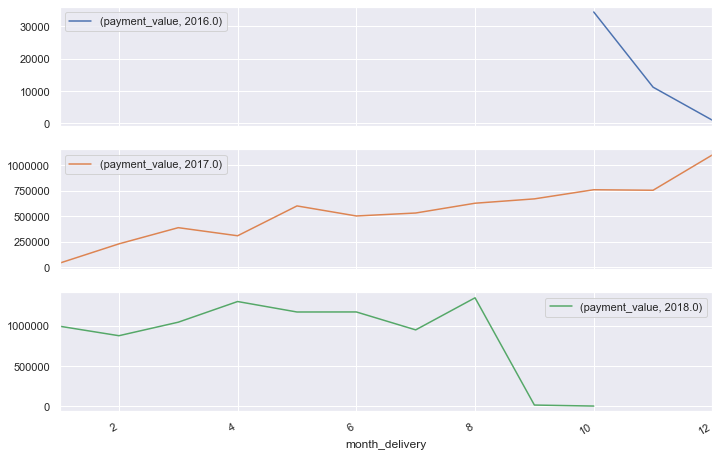

In [50]:
monthly_orders_values_df.unstack(level=0).plot(kind='line', subplots=True);

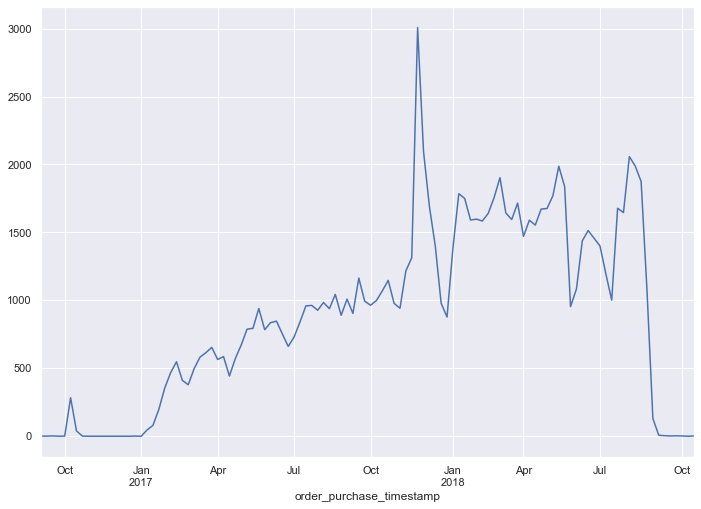

In [51]:
orders = data['olist_orders_dataset']
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders = orders.set_index('order_purchase_timestamp')
orders.resample('W')['order_id'].count().plot()

#### Customer Satisfaction

In [ ]:
#Plot customer satisfaction

In [ ]:
#handle datetime

In [ ]:
data['']

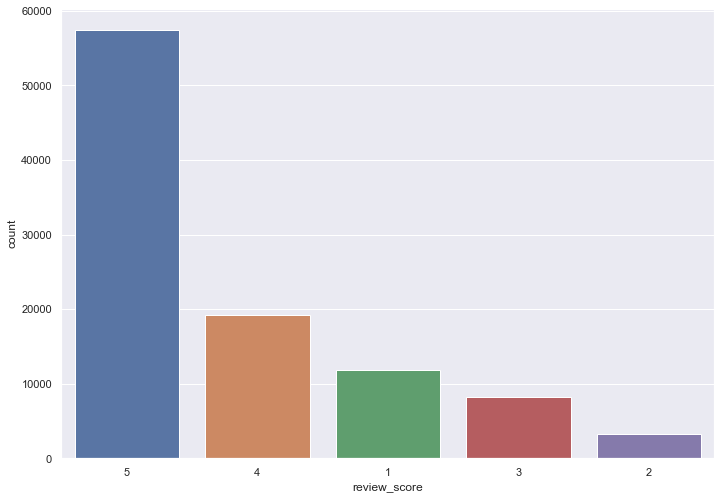

In [40]:
# Plot metric
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='review_score',data=data['olist_order_reviews_dataset'], order=data['olist_order_reviews_dataset']['review_score'].value_counts().index);

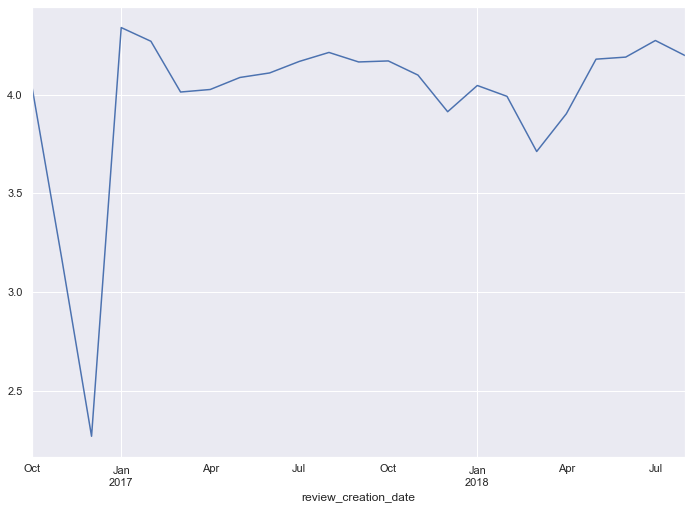

In [53]:
#handle datetime
reviews_df = data['olist_order_reviews_dataset']
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'])
reviews_df = reviews_df.set_index(['review_creation_date'])
reviews_df.resample('M')['review_score'].mean().plot()

#### Shipping delay

In [ ]:
#Load orders

In [ ]:
#Handle datetime

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='review_score',data=data['olist_order_reviews_dataset'], order=data['olist_order_reviews_dataset']['review_score'].value_counts().index);

In [ ]:
#Plot distribution of wait_time and delay_vs_expected
